In [1]:
!pip install fbprophet

     ---------------------------------------- 0.0/64.0 kB ? eta -:--:--
     ---------------------------------------- 64.0/64.0 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for Cython>=0.22 from https://files.pythonhosted.org/packages/30/67/c99ec81380cd9d2c798eb1572f61dbe50318958925049b39029f73fe6b52/cython-3.1.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy==0.9.5 from https://files.pythonhosted.org/packages/e3/e2/204c9c6beaf9e05ad28bd589c154afff35dffa6166d76841d3c0dec6c1e3/cmdstanpy-0.9.5-py3-none-any.whl.metadata
  Obtaining dependency information for pystan>=2.14 from https://files.pythonhosted.org/packages/3f/7f/657d722f81035931513a9760751a215f09fb1474c15c043b5a5ed17e61ca/pystan-3.10.0-py3-none-any.whl.metadata
  Obtaining dependency information for LunarCalendar>=0.0.9 from https://files.pythonhosted.org/packages/ab/e0/a52ffc0239547485

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\yasha\AppData\Local\Temp\pip-install-r7wbybjf\pystan_4695fbe7f3cd44aaa17ca2cb7f7e172e\setup.py", line 122, in <module>
      from Cython.Build.Inline import _get_build_extension
  ModuleNotFoundError: No module named 'Cython'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import pandas as pd

In [15]:
temp_df = pd.read_csv("daily-minimum-temperatures-in-me.csv")
temp_df.head()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,01-01-1981,20.7
1,02-01-1981,17.9
2,03-01-1981,18.8
3,04-01-1981,14.6
4,05-01-1981,15.8


In [16]:
temp_df.shape

(3650, 2)

In [17]:
temp_df.isna().sum()

Date                                                             0
Daily minimum temperatures in Melbourne, Australia, 1981-1990    0
dtype: int64

In [21]:
temp_df.dtypes

Date                                                             datetime64[ns]
Daily minimum temperatures in Melbourne, Australia, 1981-1990           float64
dtype: object

In [20]:
temp_df['Date']=pd.to_datetime(temp_df['Date'])

C:\Users\yasha\AppData\Local\Temp\ipykernel_26156\407981802.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  temp_df['Date']=pd.to_datetime(temp_df['Date'])


In [22]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Date                                                           3650 non-null   datetime64[ns]
 1   Daily minimum temperatures in Melbourne, Australia, 1981-1990  3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [23]:
temp_df['Daily minimum temperatures']=temp_df['Daily minimum temperatures in Melbourne, Australia, 1981-1990']

In [26]:
temp_df.head()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990",Daily minimum temperatures
0,1981-01-01,20.7,20.7
1,1981-02-01,17.9,17.9
2,1981-03-01,18.8,18.8
3,1981-04-01,14.6,14.6
4,1981-05-01,15.8,15.8


In [32]:
temp_df=temp_df.drop('Daily minimum temperatures in Melbourne, Australia, 1981-1990',axis='columns')

In [38]:
temp_df.rename(columns={'Date':'ds','Daily minimum temperatures':'y'},inplace=True)

In [35]:
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [36]:
model=Prophet()

In [39]:
model.fit(temp_df)

00:22:02 - cmdstanpy - INFO - Chain [1] start processing
00:22:03 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
future=model.make_future_dataframe(periods=10, freq='D')

forecast=model.predict(future)

In [41]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,11.572053,9.279996,18.508980,11.572053,11.572053,2.327334,2.327334,2.327334,-0.049769,-0.049769,-0.049769,2.377103,2.377103,2.377103,0.0,0.0,0.0,13.899387
1,1981-01-02,11.570779,9.446880,18.253397,11.570779,11.570779,2.424209,2.424209,2.424209,-0.013077,-0.013077,-0.013077,2.437286,2.437286,2.437286,0.0,0.0,0.0,13.994988
2,1981-01-03,11.569506,9.567077,18.440003,11.569506,11.569506,2.502872,2.502872,2.502872,0.013917,0.013917,0.013917,2.488955,2.488955,2.488955,0.0,0.0,0.0,14.072377
3,1981-01-04,11.568232,9.268770,18.453981,11.568232,11.568232,2.492996,2.492996,2.492996,-0.038344,-0.038344,-0.038344,2.531340,2.531340,2.531340,0.0,0.0,0.0,14.061228
4,1981-01-05,11.566958,9.277215,18.601147,11.566958,11.566958,2.479656,2.479656,2.479656,-0.084273,-0.084273,-0.084273,2.563929,2.563929,2.563929,0.0,0.0,0.0,14.046614


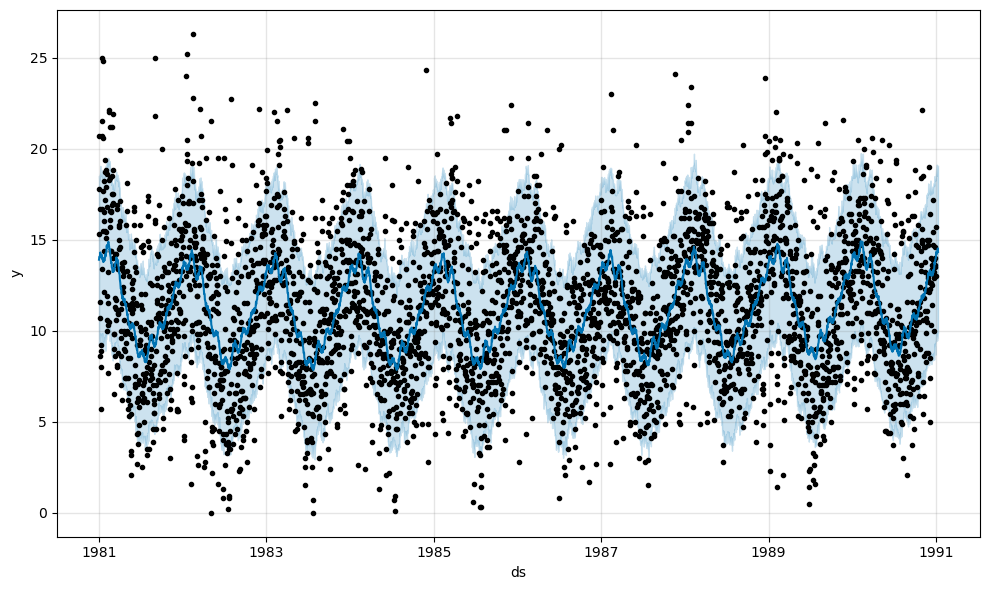

In [42]:
fig=model.plot(forecast)

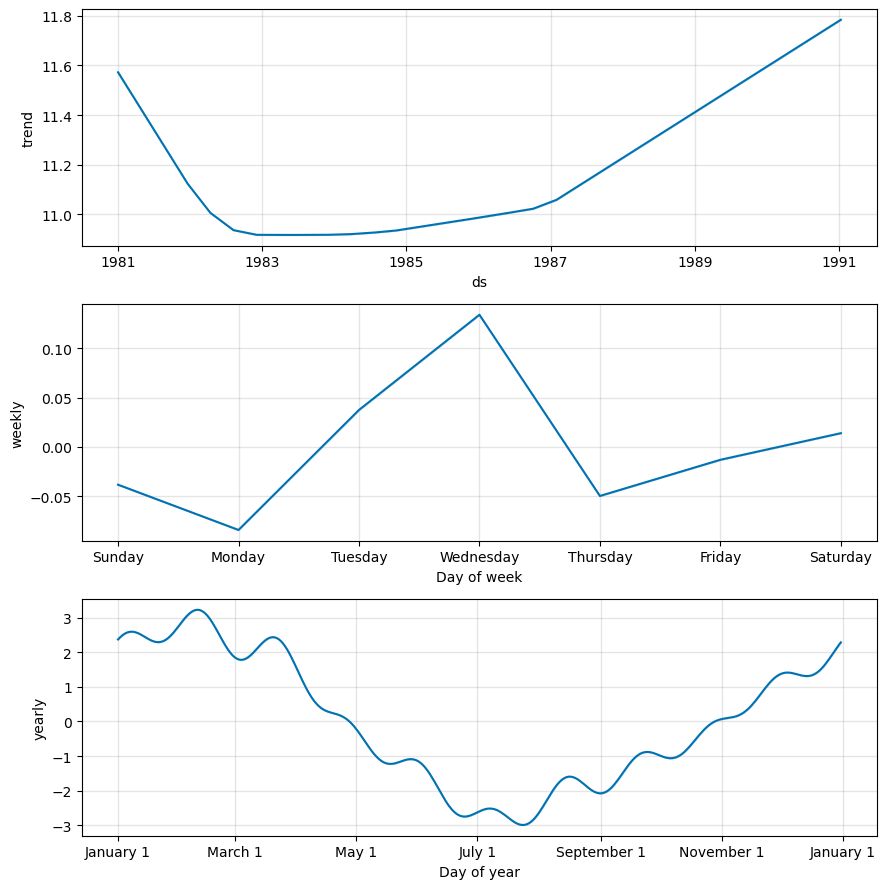

In [43]:
components=model.plot_components(forecast)